<img src='http://hilpisch.com/tpq_logo.png' width="300px" align="right">

# Intermediate Python &mdash; Day 2

**NumPy Applied to Finance**

In [1]:
import numpy as np

In [2]:
rn = np.random.standard_normal((100, 3))

In [3]:
rn[:10].round(2)

array([[-1.11, -0.34,  1.66],
       [-0.56,  0.9 ,  1.5 ],
       [ 1.06, -0.37,  1.05],
       [ 0.72,  0.32, -0.83],
       [ 1.69,  0.43, -1.27],
       [-1.16,  0.83,  0.25],
       [ 0.36,  1.42, -0.59],
       [-2.  , -0.09, -0.41],
       [-1.54, -1.22, -1.72],
       [ 1.04,  0.39, -0.06]])

In [4]:
rn[:10].cumsum(axis=0).round(2)

array([[-1.11, -0.34,  1.66],
       [-1.67,  0.57,  3.15],
       [-0.62,  0.19,  4.2 ],
       [ 0.11,  0.51,  3.37],
       [ 1.8 ,  0.94,  2.11],
       [ 0.64,  1.77,  2.35],
       [ 1.  ,  3.18,  1.76],
       [-1.  ,  3.1 ,  1.36],
       [-2.53,  1.88, -0.36],
       [-1.49,  2.27, -0.43]])

In [5]:
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

In [6]:
rn[0] = 0.0

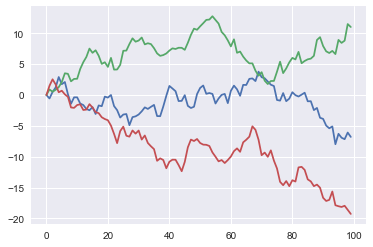

In [7]:
plt.plot(rn.cumsum(axis=0));

## Valuation of European Option by MCS

In [8]:
S0 = 36.
r = 0.06
T = 1.0
sigma = 0.2

In [9]:
z = np.random.standard_normal(10000)

In [10]:
%time ST = S0 * np.exp((r - sigma ** 2 / 2) * T + sigma * T ** 0.5 * z)

CPU times: user 408 µs, sys: 168 µs, total: 576 µs
Wall time: 488 µs


In [11]:
ST.mean()

38.123304399624459

In [12]:
import math

In [13]:
S0 * math.exp(r * T)

38.22611567563295

In [48]:
%%time
for _ in range(100000):
    _r_ = np.exp(0.05)
    # _r_ = math.exp(0.05)

CPU times: user 108 ms, sys: 3.88 ms, total: 112 ms
Wall time: 111 ms


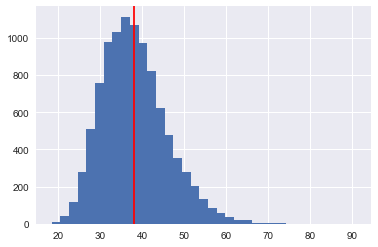

In [15]:
plt.hist(ST, bins=35)
plt.axvline(ST.mean(), color='r');

In [16]:
K = 40.

In [17]:
h = np.maximum(K - ST, 0)

In [18]:
h[:10]

array([ 0.28804124,  0.13481958,  2.46022957,  2.10892485,  0.        ,
        5.7209812 ,  0.        ,  3.34141639,  0.        ,  9.0315011 ])

In [19]:
P0 = math.exp(-r * T) * h.mean()
P0

3.9129081652985822

In [20]:
M = 50
I = 100000

In [21]:
zt = np.random.standard_normal((M + 1, I)) 

In [63]:
zt.mean()

0.00021979864848227772

In [64]:
zt.std()

1.0002653985608809

In [66]:
zt -= zt.mean()  # correcting the first moment

In [67]:
zt /= zt.std()  # correcting the second moment

In [68]:
zt.mean()

2.7948014273230606e-18

In [69]:
zt.std()

0.99999999999999867

In [70]:
S = np.zeros_like(zt)

In [71]:
S[0] = S0

In [72]:
dt = T / M

In [73]:
%%time
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - sigma ** 2 / 2) * dt +
                            sigma * dt ** 0.5 * zt[t])

CPU times: user 84.9 ms, sys: 1.95 ms, total: 86.9 ms
Wall time: 86 ms


In [74]:
S[-1].mean()

38.237366454998757

In [75]:
h = np.maximum(K - S[-1], 0)

In [76]:
P0 = math.exp(-r * T) * h.mean()
P0

3.8501412345189339

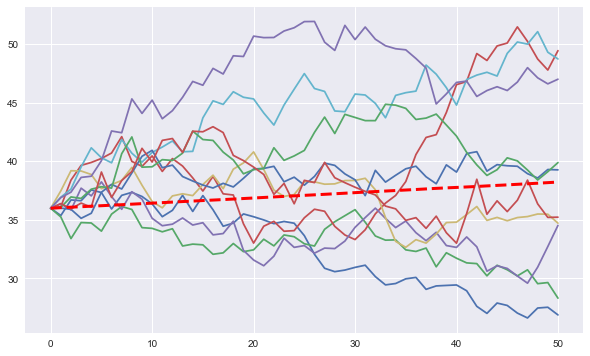

In [77]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10])
plt.plot(S.mean(axis=1), 'r--', lw=3);

## Excursion: OLS Regression

In [78]:
x = np.linspace(0, 10, 15)

In [79]:
y = 0.5 * x ** 2 - 1.5 * x + 2 + np.random.standard_normal(len(x)) * 1.5

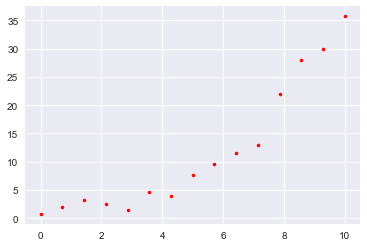

In [80]:
plt.plot(x, y, 'r.');

In [81]:
reg_0 = np.polyfit(x, y, deg=0)
reg_0

array([ 11.73833679])

In [82]:
reg_1 = np.polyfit(x, y, deg=1)
reg_1

array([ 3.34120874, -4.96770689])

In [83]:
reg_2 = np.polyfit(x, y, deg=2)
reg_2

array([ 0.49101668, -1.5689581 ,  2.63136083])

In [84]:
np.polyval(reg_1, x)

array([ -4.96770689,  -2.58112922,  -0.19455155,   2.19202612,
         4.57860379,   6.96518146,   9.35175913,  11.73833679,
        14.12491446,  16.51149213,  18.8980698 ,  21.28464747,
        23.67122514,  26.05780281,  28.44438048])

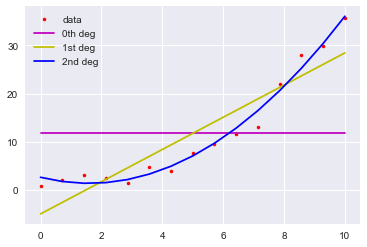

In [85]:
plt.plot(x, y, 'r.', label='data')
plt.plot(x, np.polyval(reg_0, x), 'm', label='0th deg')
plt.plot(x, np.polyval(reg_1, x), 'y', label='1st deg')
plt.plot(x, np.polyval(reg_2, x), 'b', label='2nd deg')
plt.legend(loc=0);

## Valuing an American Put Option by MCS

Least-Squares Monte Carlo Valuation (LSM algorithm).

In [86]:
h = np.maximum(K - S, 0)

In [87]:
df = math.exp(-r * dt)
df

0.9988007197120864

4.4462147850838791

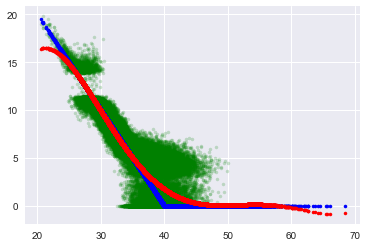

In [88]:
V = h[-1].copy()
for t in range(M - 1, 0, -1):
    reg = np.polyfit(S[t], df * V, deg=5)
    C = np.polyval(reg, S[t])
    if t == 25:
        plt.plot(S[t], df * V, 'g.', alpha=0.2)
        plt.plot(S[t], h[t], 'b.')
        plt.plot(S[t], C, 'r.')
    V = np.where(h[t] > C, h[t], df * V)
V0 = df * V.mean()
V0

<img src='http://hilpisch.com/tpq_logo.png' width="300px" align="right">